## Historical RTM Settlement Point Prices (SPP) Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
file_path = r"C:\Users\david\Downloads\2024_SPP_ERCOT\SPP_FILE_2024.xlsx"

SPP_df = pd.read_excel(file_path, sheet_name = "Jan")

In [5]:
SPP_df.head(10)

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
0,01/01/2024,1,1,N,HB_BUSAVG,SH,12.77
1,01/01/2024,1,2,N,HB_BUSAVG,SH,13.62
2,01/01/2024,1,3,N,HB_BUSAVG,SH,14.67
3,01/01/2024,1,4,N,HB_BUSAVG,SH,15.12
4,01/01/2024,1,1,N,HB_HOUSTON,HU,12.58
5,01/01/2024,1,2,N,HB_HOUSTON,HU,13.35
6,01/01/2024,1,3,N,HB_HOUSTON,HU,14.47
7,01/01/2024,1,4,N,HB_HOUSTON,HU,15.12
8,01/01/2024,1,1,N,HB_HUBAVG,AH,12.58
9,01/01/2024,1,2,N,HB_HUBAVG,AH,13.45


In [6]:
SPP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68448 entries, 0 to 68447
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Delivery Date           68448 non-null  object 
 1   Delivery Hour           68448 non-null  int64  
 2   Delivery Interval       68448 non-null  int64  
 3   Repeated Hour Flag      68448 non-null  object 
 4   Settlement Point Name   68448 non-null  object 
 5   Settlement Point Type   68448 non-null  object 
 6   Settlement Point Price  68448 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.7+ MB


In [7]:
SPP_df['Settlement Point Name'].unique()

array(['HB_BUSAVG', 'HB_HOUSTON', 'HB_HUBAVG', 'HB_NORTH', 'HB_PAN',
       'HB_SOUTH', 'HB_WEST', 'LZ_AEN', 'LZ_CPS', 'LZ_HOUSTON', 'LZ_LCRA',
       'LZ_NORTH', 'LZ_RAYBN', 'LZ_SOUTH', 'LZ_WEST'], dtype=object)

### We specifically only desire to put batteries in the Houston zone, disregard transmission between the four zones.

### Subsequently we can focus on LZ_HOUSTON

In [8]:
Houston_df = SPP_df[SPP_df['Settlement Point Name'] == 'LZ_HOUSTON']

In [9]:
Houston_df.head(15)

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
44,01/01/2024,1,1,N,LZ_HOUSTON,LZ,12.51
45,01/01/2024,1,1,N,LZ_HOUSTON,LZEW,12.51
46,01/01/2024,1,2,N,LZ_HOUSTON,LZ,13.28
47,01/01/2024,1,2,N,LZ_HOUSTON,LZEW,13.28
48,01/01/2024,1,3,N,LZ_HOUSTON,LZ,14.41
49,01/01/2024,1,3,N,LZ_HOUSTON,LZEW,14.41
50,01/01/2024,1,4,N,LZ_HOUSTON,LZ,15.08
51,01/01/2024,1,4,N,LZ_HOUSTON,LZEW,15.08
136,01/01/2024,2,1,N,LZ_HOUSTON,LZEW,15.65
137,01/01/2024,2,1,N,LZ_HOUSTON,LZ,15.65


In [10]:
Houston_df['Delivery Hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [11]:
import numpy as np

# Pseudocode


In [20]:
import pandas as pd

# Ensure Delivery Date is in datetime format
Houston_df['Delivery Date'] = pd.to_datetime(Houston_df['Delivery Date'])

# Avoid ambiguity: Do not use Delivery Date as both column and index
# (If you've already set it as the index, reset it first.)
Houston_df.reset_index(drop=True, inplace=True)

# Group by Delivery Date and Delivery Hour to calculate the mean Settlement Point Price
Houston_df['delivery_hourly_avg'] = Houston_df.groupby(['Delivery Date', 'Delivery Hour'])['Settlement Point Price'].transform('mean')

# Display the first 10 rows to confirm
print(Houston_df.head(10))


  Delivery Date  Delivery Hour  Delivery Interval Repeated Hour Flag  \
0    2024-01-01              1                  1                  N   
1    2024-01-01              1                  1                  N   
2    2024-01-01              1                  2                  N   
3    2024-01-01              1                  2                  N   
4    2024-01-01              1                  3                  N   
5    2024-01-01              1                  3                  N   
6    2024-01-01              1                  4                  N   
7    2024-01-01              1                  4                  N   
8    2024-01-01              2                  1                  N   
9    2024-01-01              2                  1                  N   

  Settlement Point Name Settlement Point Type  Settlement Point Price  \
0            LZ_HOUSTON                    LZ                   12.51   
1            LZ_HOUSTON                  LZEW                

C:\Users\david\AppData\Local\Temp\ipykernel_18928\2421570835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Houston_df['Delivery Date'] = pd.to_datetime(Houston_df['Delivery Date'])
C:\Users\david\AppData\Local\Temp\ipykernel_18928\2421570835.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Houston_df['delivery_hourly_avg'] = Houston_df.groupby(['Delivery Date', 'Delivery Hour'])['Settlement Point Price'].transform('mean')


In [21]:
Houston_df.describe()


,Delivery Date,Delivery Hour,Delivery Interval,Settlement Point Price,delivery_hourly_avg
count,5952,5952.000000,5952.000000,5952.000000,5952.000000
mean,2024-01-16 00:00:00,12.500000,2.500000,32.066741,32.066741
min,2024-01-01 00:00:00,1.000000,1.000000,-32.000000,-31.845000
25%,2024-01-08 00:00:00,6.750000,1.750000,16.660000,16.778437
50%,2024-01-16 00:00:00,12.500000,2.500000,21.960000,22.026875
75%,2024-01-24 00:00:00,18.250000,3.250000,31.240000,32.980000
max,2024-01-31 00:00:00,24.000000,4.000000,1165.110000,668.400000
std,NaN,6.922768,1.118128,48.197251,43.764352


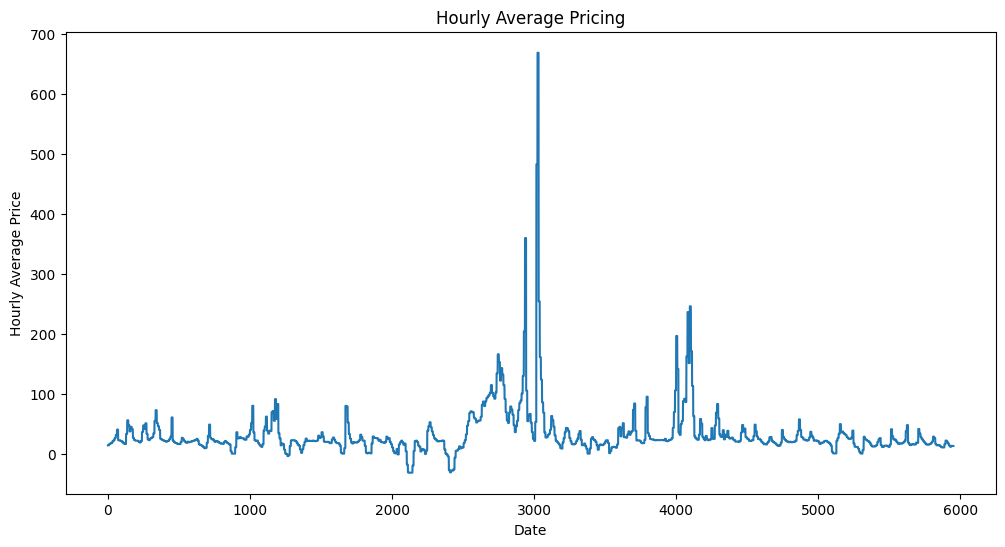

In [ ]:
ax = Houston_df['delivery_hourly_avg'].plot(figsize =(12,6), title = 'Hourly Average Pricing')
ax.set_ylabel('Hourly Average Price')
ax.set_xlabel('Date')
plt.show()

## So January is completed... Now I should do the same process to every month... merge the dataframes and finally examine the spreads

In [38]:
# Let's create a function to automate the process

def ercot_df(sheet_name):
    
    df = pd.read_excel(r"C:\Users\david\Downloads\2024_SPP_ERCOT\SPP_FILE_2024.xlsx", sheet_name = sheet_name)

    df = df[df['Settlement Point Name']== 'LZ_HOUSTON']

    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

    df.reset_index(drop=True, inplace=True)

    df['delivery_hourly_avg'] = df.groupby(['Delivery Date', 'Delivery Hour'])['Settlement Point Price'].transform('mean')

    return df

df_feb = ercot_df('Feb')

In [39]:
df_feb.head(10)

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price,delivery_hourly_avg
0,2024-02-01,1,1,N,LZ_HOUSTON,LZ,8.86,10.59625
1,2024-02-01,1,1,N,LZ_HOUSTON,LZEW,8.85,10.59625
2,2024-02-01,1,2,N,LZ_HOUSTON,LZ,11.95,10.59625
3,2024-02-01,1,2,N,LZ_HOUSTON,LZEW,11.95,10.59625
4,2024-02-01,1,3,N,LZ_HOUSTON,LZ,10.77,10.59625
5,2024-02-01,1,3,N,LZ_HOUSTON,LZEW,10.77,10.59625
6,2024-02-01,1,4,N,LZ_HOUSTON,LZ,10.81,10.59625
7,2024-02-01,1,4,N,LZ_HOUSTON,LZEW,10.81,10.59625
8,2024-02-01,2,1,N,LZ_HOUSTON,LZEW,10.47,10.78500
9,2024-02-01,2,1,N,LZ_HOUSTON,LZ,10.47,10.78500


In [40]:
df_mar = ercot_df('Mar')
df_apr = ercot_df('Apr')
df_may = ercot_df('May')
df_jun = ercot_df('Jun')
df_jul = ercot_df('Jul')
df_aug = ercot_df('Aug')
df_sep = ercot_df('Sep')
df_oct = ercot_df('Oct')
df_nov = ercot_df('Nov')
df_dec = ercot_df('Dec')

In [41]:
#Let's concatenate/merge

Houston_Pricing_df = pd.concat([Houston_df, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec])

In [45]:
Houston_Pricing_df.to_csv(r"C:\Users\david\Downloads\2024_SPP_ERCOT\Houston_Pricing.csv", index = False)

In [42]:
Houston_Pricing_df.describe()

,Delivery Date,Delivery Hour,Delivery Interval,Settlement Point Price,delivery_hourly_avg
count,70272,70272.000000,70272.000000,70272.000000,70272.000000
mean,2024-07-01 12:39:00.983606528,12.499886,2.500000,27.197756,27.197756
min,2024-01-01 00:00:00,1.000000,1.000000,-32.000000,-31.845000
25%,2024-04-01 00:00:00,6.750000,1.750000,14.730000,14.862187
50%,2024-07-02 00:00:00,12.500000,2.500000,20.015000,20.155625
75%,2024-10-01 00:00:00,18.250000,3.250000,25.530000,26.248438
max,2024-12-31 00:00:00,24.000000,4.000000,4981.420000,3066.181250
std,NaN,6.922400,1.118042,85.137050,70.618420


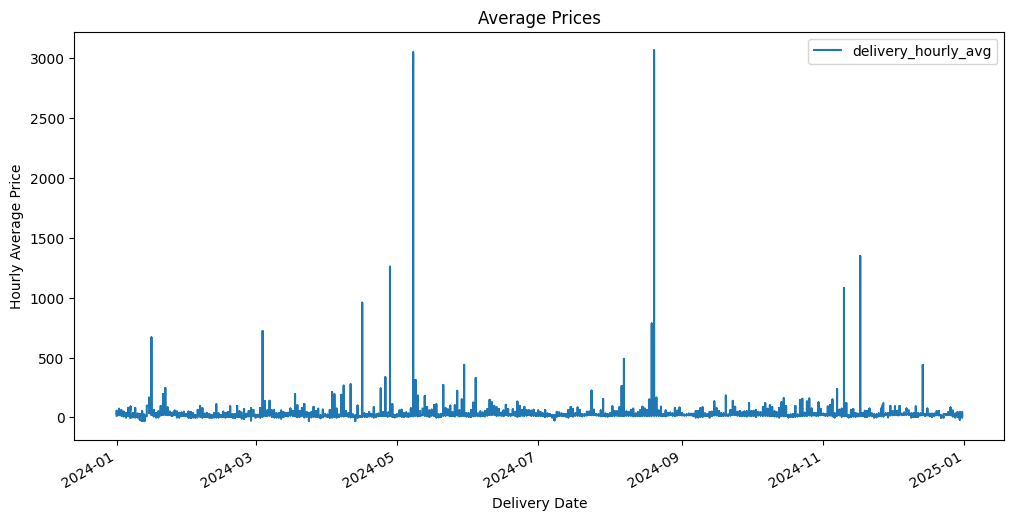

In [46]:
ax = Houston_Pricing_df.plot(
    x='Delivery Date',
    y='delivery_hourly_avg',
    figsize=(12, 6),
    title='Average Prices'
)
ax.set_ylabel('Hourly Average Price')
ax.set_xlabel('Delivery Date')
plt.show()

## Ok coolio we have all of the information within one dataframe

#### Now we have three more jobs. 

##### 1 - Create a formula to understand how the sizing of the battery affects both the gas station and the amount of time spread we can take advantage of.

##### 2 - Create a formula to examine the most profitable time spreads, considering energy loss from the battery, particularly the duration...

##### 3 - Utilizing the duration info, as well as the sizing affects on gas station and amount of time spread, determine the size of battery that would generate the most...


## ALPHAAAA

In [49]:
#Basic assumption from energybrokers uk: 5 kilowatt hours per pump per hour of operation

#There are about 1132 gas stations in Texas

#For first thesis let's aim for 100 gas stations, each with 6 pumps

def gas_station_energy(number_of_pumps, outage_period):
    energy_per_pump_per_hour = 5
    energy_per_station_per_hour = number_of_pumps * energy_per_pump_per_hour
    energy_per_station_per_day = energy_per_station_per_hour * 24
    total_energy_for_outage = energy_per_station_per_day * outage_period
    return total_energy_for_outage

gas_station_energy(6, 6)

4320

In [51]:
Houston_Pricing_df[Houston_Pricing_df['Delivery Date'] == '2024-12-31'].describe()

,Delivery Date,Delivery Hour,Delivery Interval,Settlement Point Price,delivery_hourly_avg
count,192,192.000000,192.000000,192.000000,192.000000
mean,2024-12-31 00:00:00,12.500000,2.500000,19.077604,19.077604
min,2024-12-31 00:00:00,1.000000,1.000000,-1.440000,-0.567500
25%,2024-12-31 00:00:00,6.750000,1.750000,13.915000,12.516563
50%,2024-12-31 00:00:00,12.500000,2.500000,19.835000,20.231250
75%,2024-12-31 00:00:00,18.250000,3.250000,22.370000,22.288750
max,2024-12-31 00:00:00,24.000000,4.000000,50.730000,42.886250
std,NaN,6.940284,1.120957,11.062357,10.408764


In [52]:
((42.886250+0.567500)/1000)*340

14.774275

In [54]:
15*10000

150000

In [55]:
#Spread Calculation

def spread_column(time_frame_hours, df):
    df['spread'] = df.groupby(['Delivery Date'])['delivery_hourly_avg'].transform('max') - df.groupby(['Delivery Date'])['delivery_hourly_avg'].transform('min')
    return df
one_hr_spread_df = spread_column(1, Houston_Pricing_df)

In [86]:
one_hr_spread_df.head(10)

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price,delivery_hourly_avg,spread
0,2024-01-01,1,1,N,LZ_HOUSTON,LZ,12.51,13.82000,41.745
8,2024-01-01,2,1,N,LZ_HOUSTON,LZEW,15.65,15.97250,41.745
16,2024-01-01,3,1,N,LZ_HOUSTON,LZ,16.06,16.99500,41.745
24,2024-01-01,4,1,N,LZ_HOUSTON,LZ,17.71,17.95250,41.745
32,2024-01-01,5,1,N,LZ_HOUSTON,LZ,20.50,20.65750,41.745
40,2024-01-01,6,1,N,LZ_HOUSTON,LZ,24.28,22.47125,41.745
48,2024-01-01,7,1,N,LZ_HOUSTON,LZ,27.57,26.16250,41.745
56,2024-01-01,8,1,N,LZ_HOUSTON,LZ,27.90,31.08875,41.745
64,2024-01-01,9,1,N,LZ_HOUSTON,LZ,68.65,40.09625,41.745
72,2024-01-01,10,1,N,LZ_HOUSTON,LZ,21.76,22.32750,41.745


In [87]:
one_hr_spread_df.drop_duplicates(subset = ['Delivery Date', 'Delivery Hour'], keep = 'first', inplace = True)

In [88]:
df = one_hr_spread_df

In [90]:
df.head(30)

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price,delivery_hourly_avg,spread
0,2024-01-01,1,1,N,LZ_HOUSTON,LZ,12.51,13.82000,41.7450
8,2024-01-01,2,1,N,LZ_HOUSTON,LZEW,15.65,15.97250,41.7450
16,2024-01-01,3,1,N,LZ_HOUSTON,LZ,16.06,16.99500,41.7450
24,2024-01-01,4,1,N,LZ_HOUSTON,LZ,17.71,17.95250,41.7450
32,2024-01-01,5,1,N,LZ_HOUSTON,LZ,20.50,20.65750,41.7450
40,2024-01-01,6,1,N,LZ_HOUSTON,LZ,24.28,22.47125,41.7450
48,2024-01-01,7,1,N,LZ_HOUSTON,LZ,27.57,26.16250,41.7450
56,2024-01-01,8,1,N,LZ_HOUSTON,LZ,27.90,31.08875,41.7450
64,2024-01-01,9,1,N,LZ_HOUSTON,LZ,68.65,40.09625,41.7450
72,2024-01-01,10,1,N,LZ_HOUSTON,LZ,21.76,22.32750,41.7450


In [68]:
print(one_hr_spread_df['spread'].describe())
x = one_hr_spread_df['spread'].sum()

print(f"The total spread for the year, 2024, is {x}")


count    8783.000000
mean       96.436662
std       260.615613
min         6.563750
25%        27.493750
50%        46.286250
75%        77.063750
max      3050.826250
Name: spread, dtype: float64
The total spread for the year, 2024, is 847003.19875


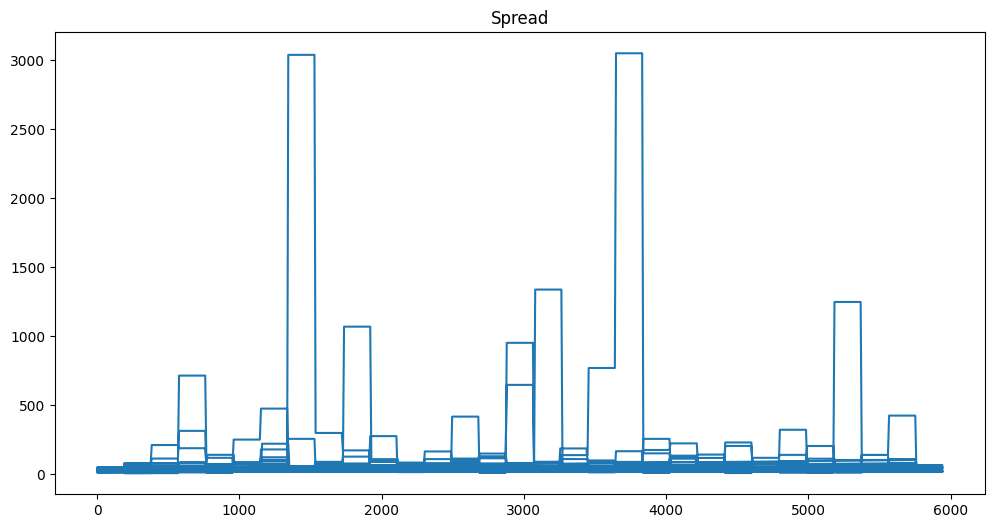

In [69]:
one_hr_spread_df['spread'].plot(figsize=(12, 6), title='Spread')
plt.show()

#### The problem with this theory is you would have to predict the perfect timing each day... and while it is generally the same, the days with the largest spreads most likely have surprising times

In [70]:
# Group by 'Delivery Hour' and calculate the sum of 'delivery_hourly_avg' for each hour
hourly_sums = one_hr_spread_df.groupby(['Delivery Hour', 'Delivery Date'])['delivery_hourly_avg'].sum()

# Find the hour with the maximum sum
peak_hour = hourly_sums.idxmax()  # The hour with the highest summed value
peak_value = hourly_sums.max()    # The maximum summed value

# Find the hour with the minimum sum
trough_hour = hourly_sums.idxmin()  # The hour with the lowest summed value
trough_value = hourly_sums.min()    # The minimum summed value

print(f"The peak hour generally is {peak_hour[0]} with a total sum of {peak_value}")
print(f"The trough hour generally is {trough_hour[0]} with a total sum of {trough_value}")


The peak hour generally is 20 with a total sum of 3066.1812499999996
The trough hour generally is 3 with a total sum of -31.845


In [71]:
df = one_hr_spread_df

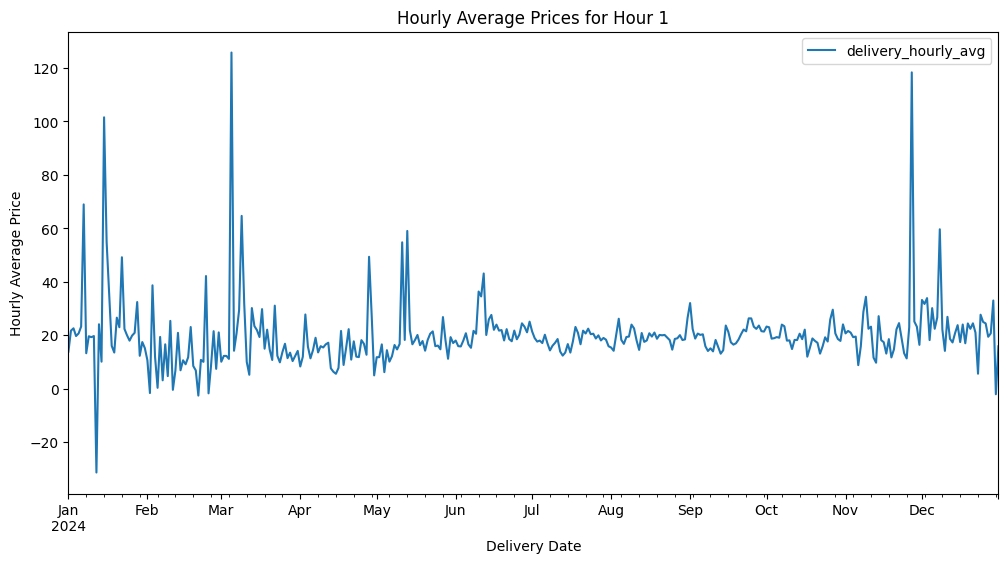

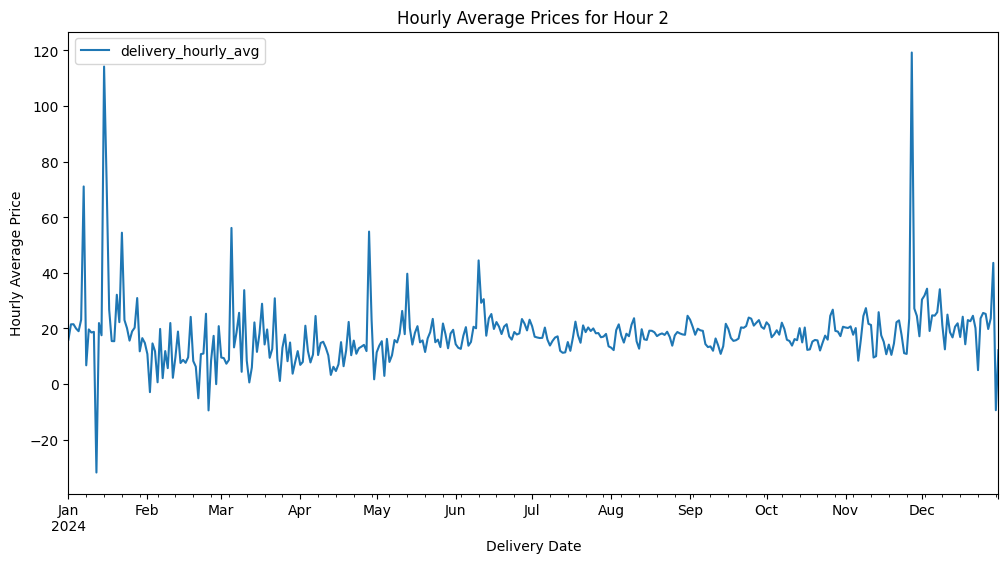

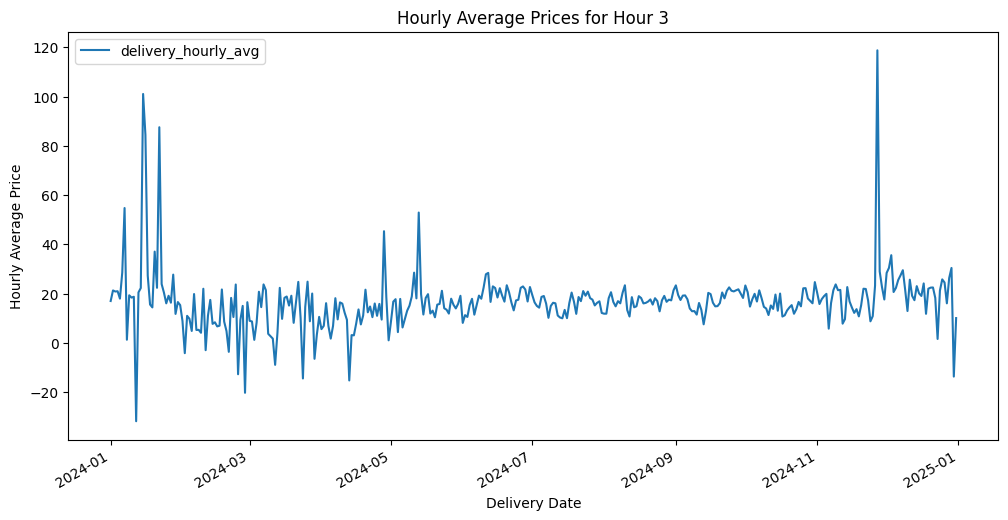

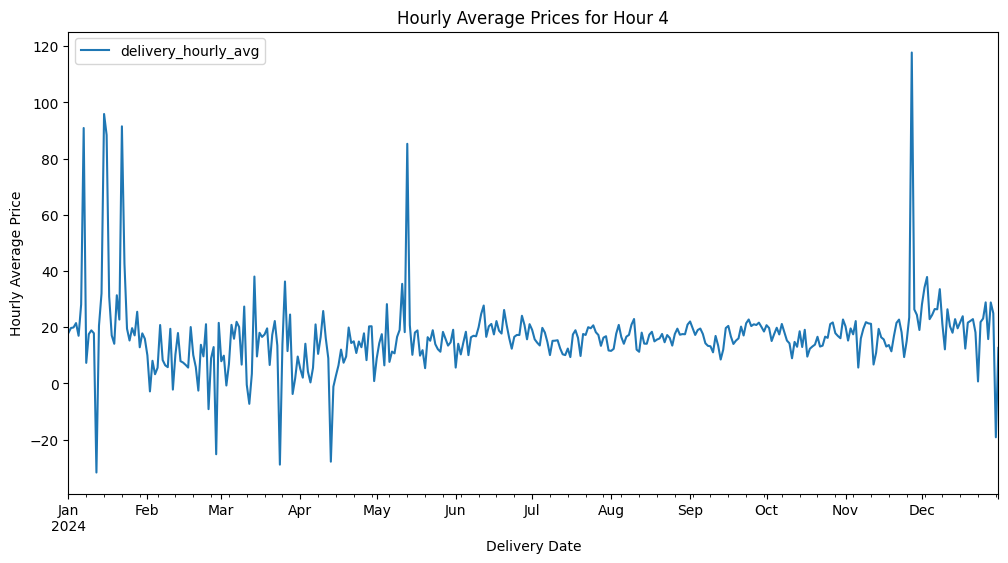

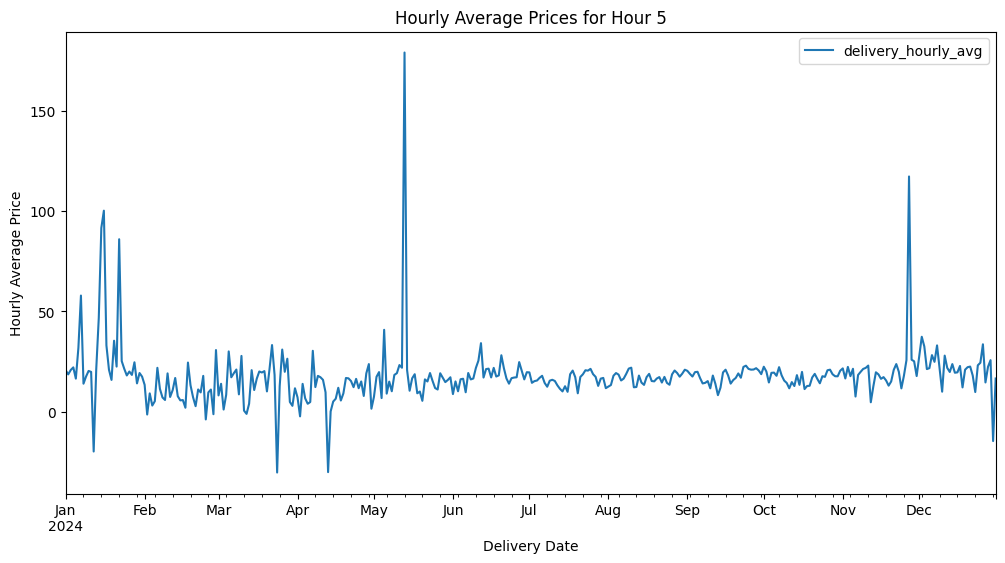

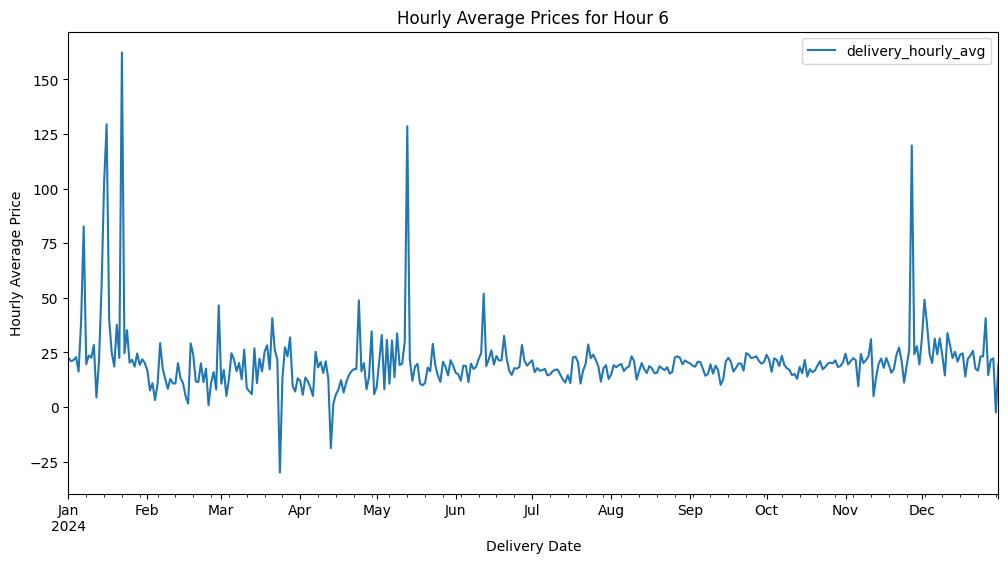

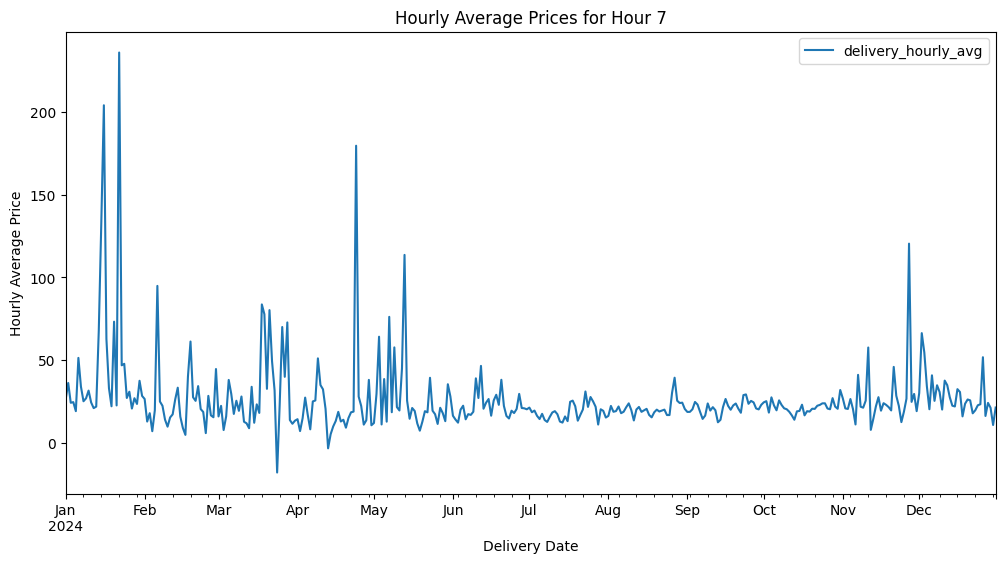

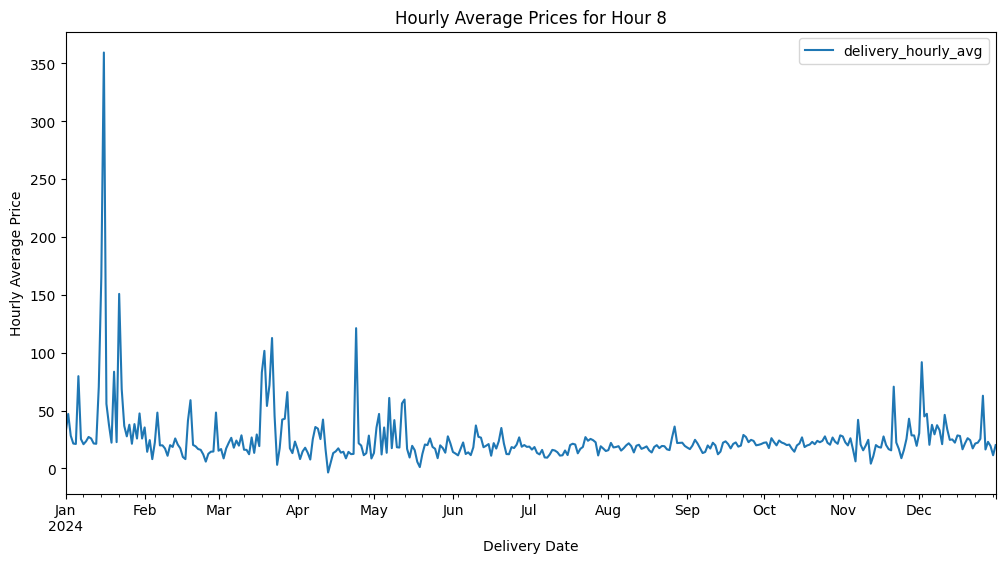

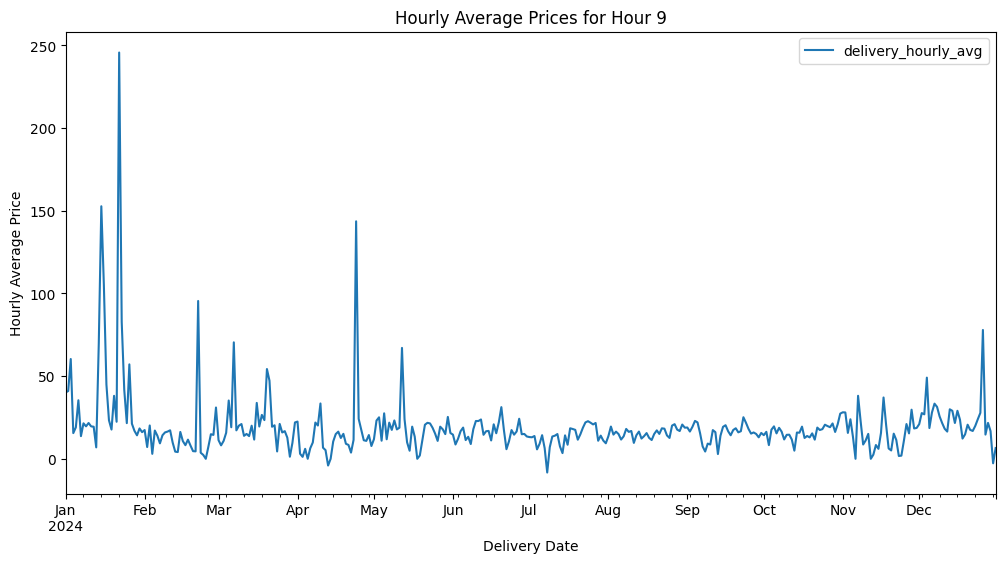

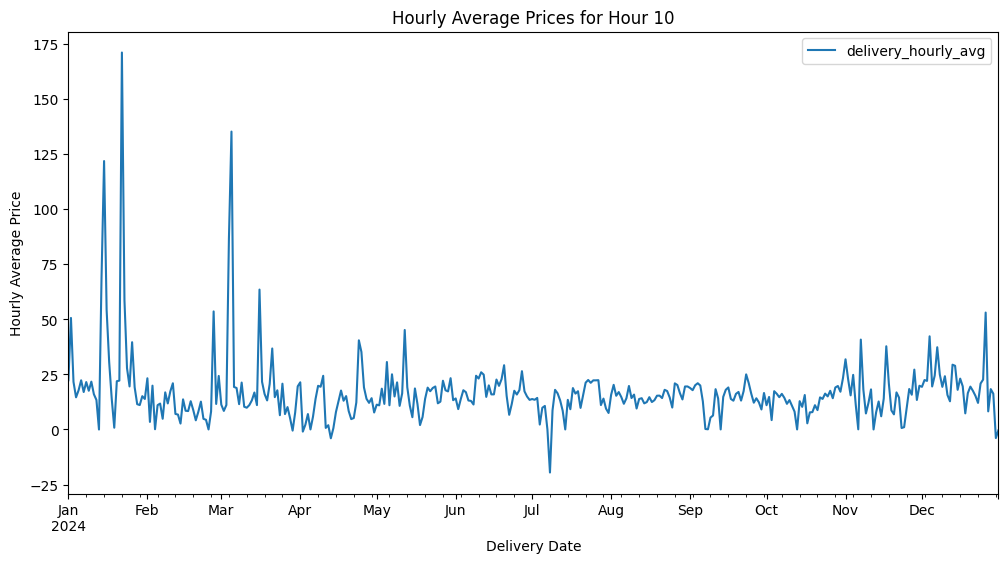

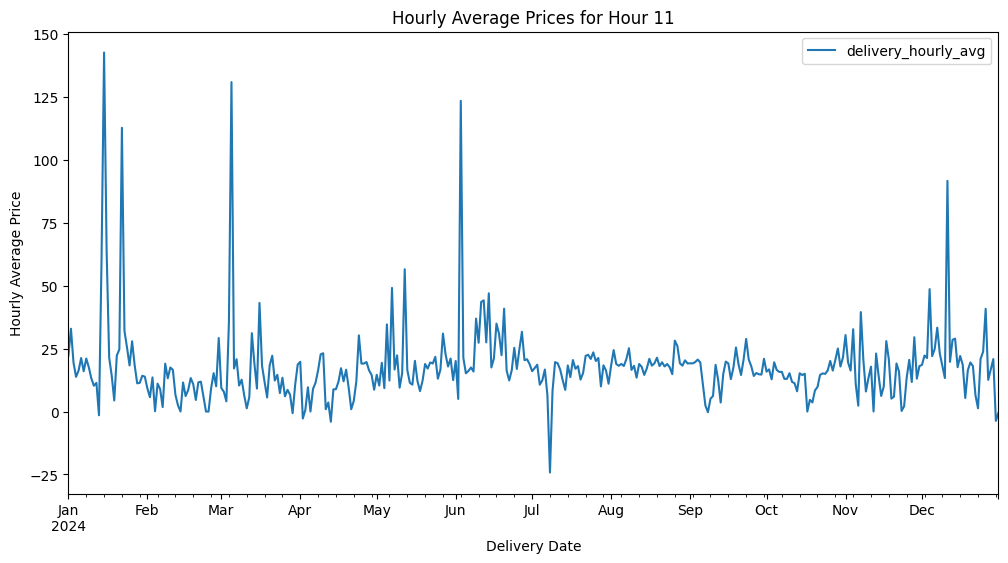

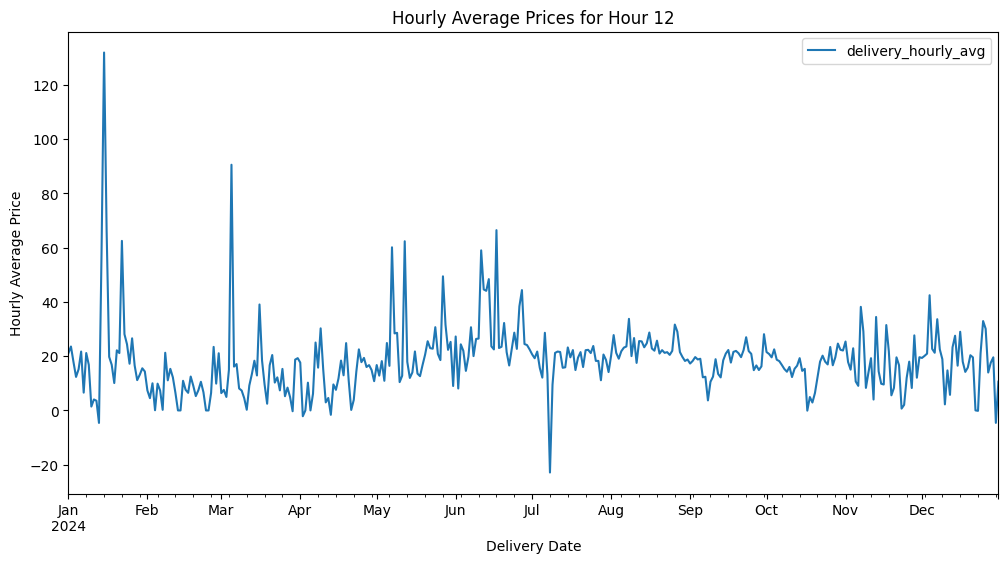

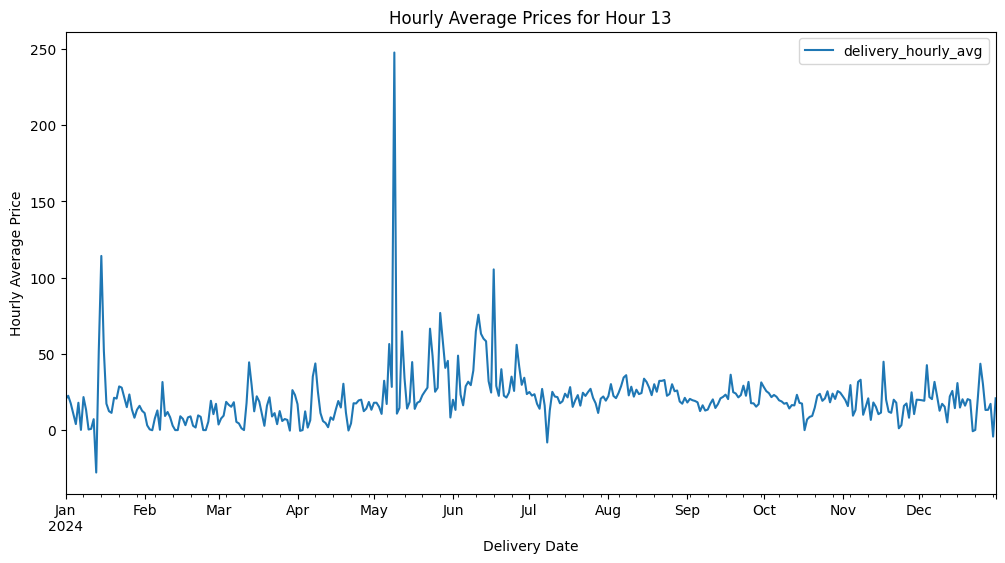

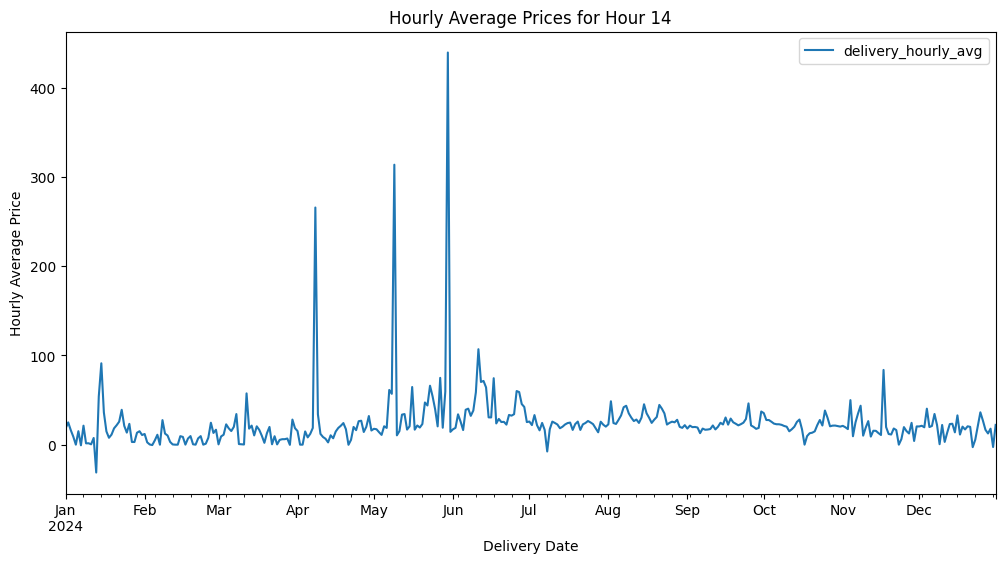

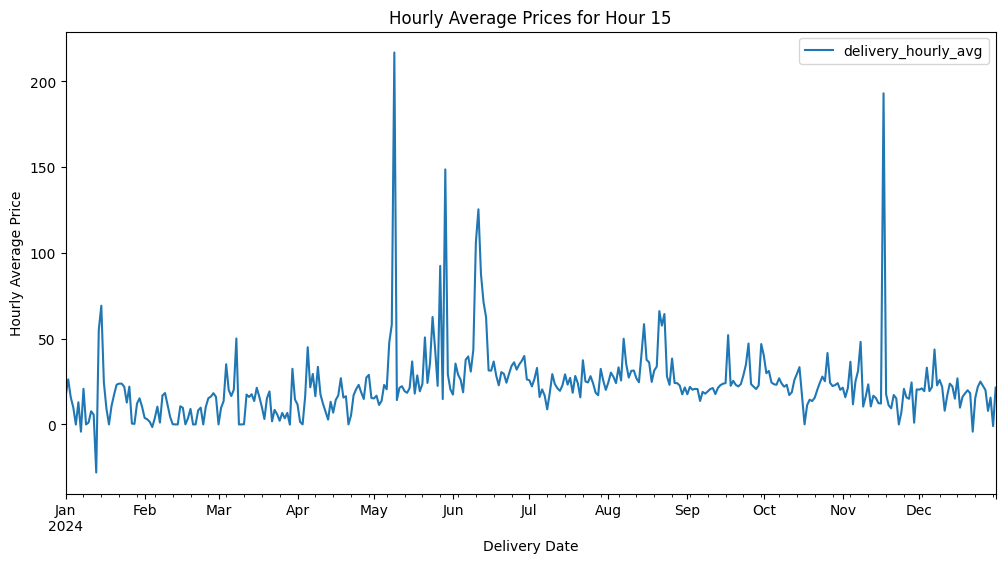

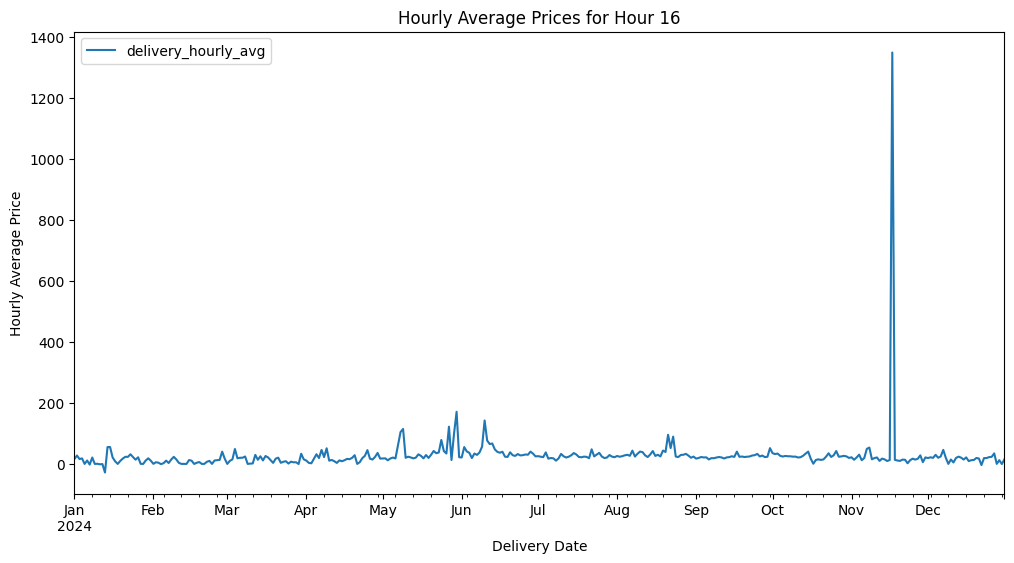

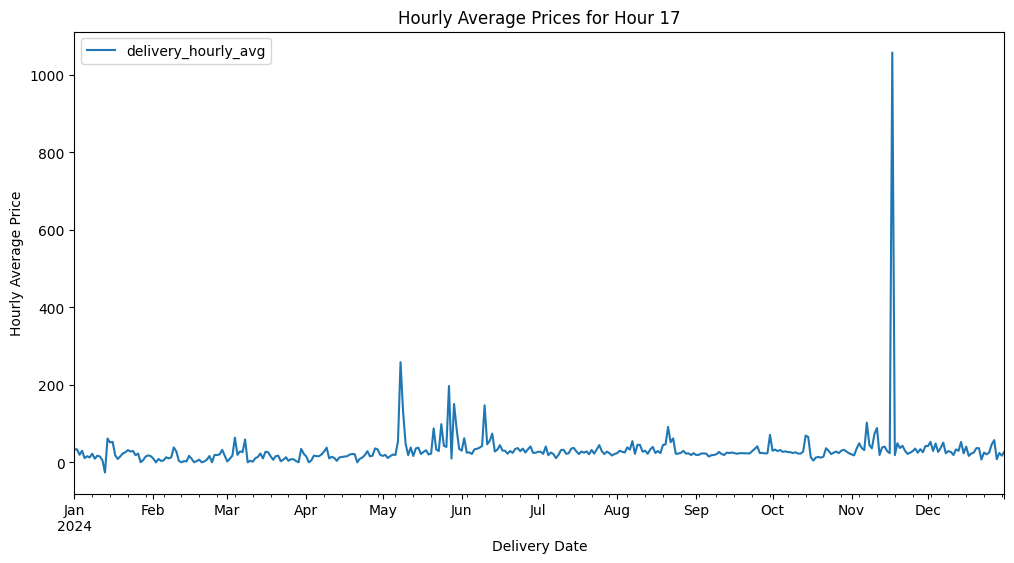

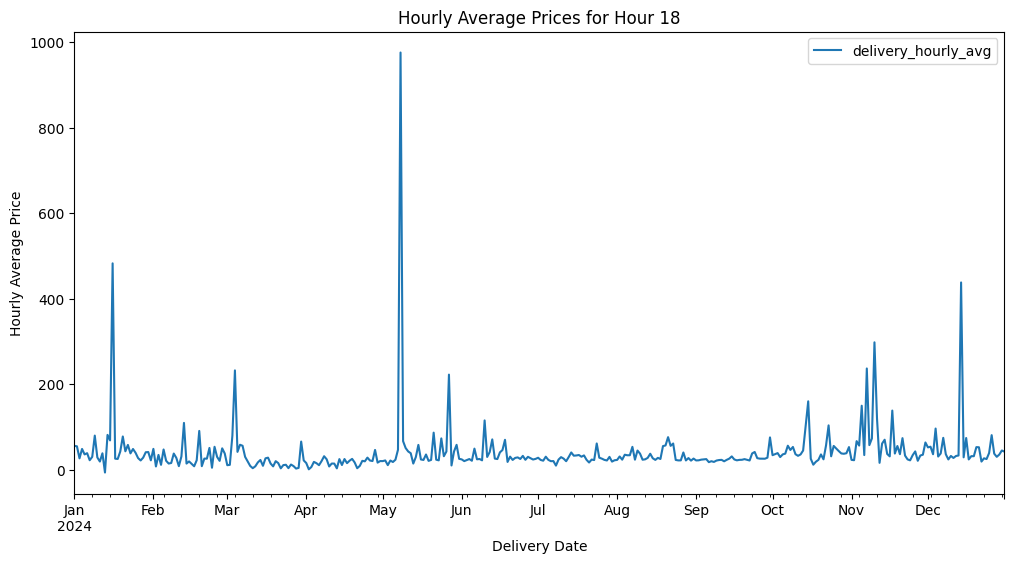

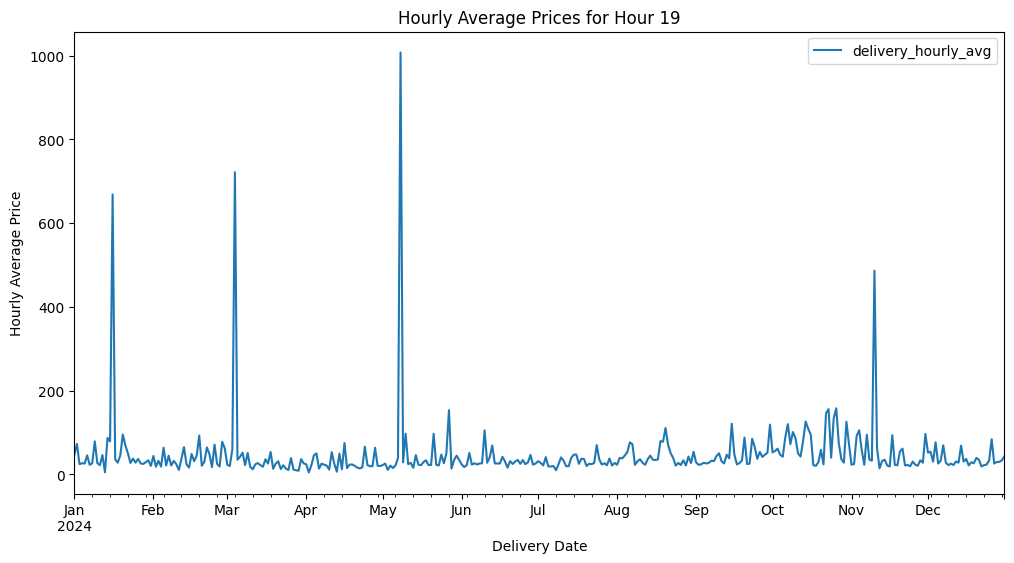

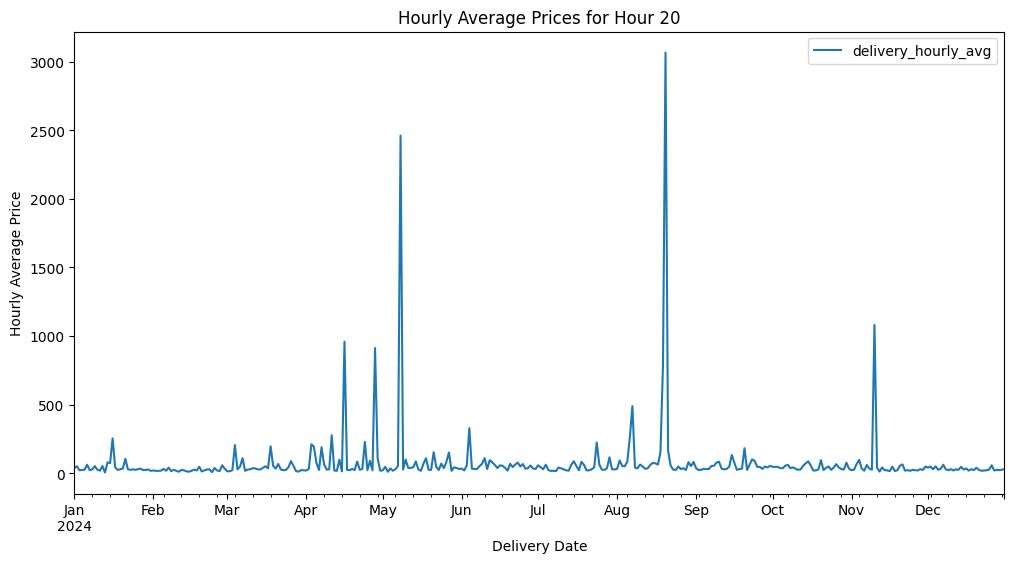

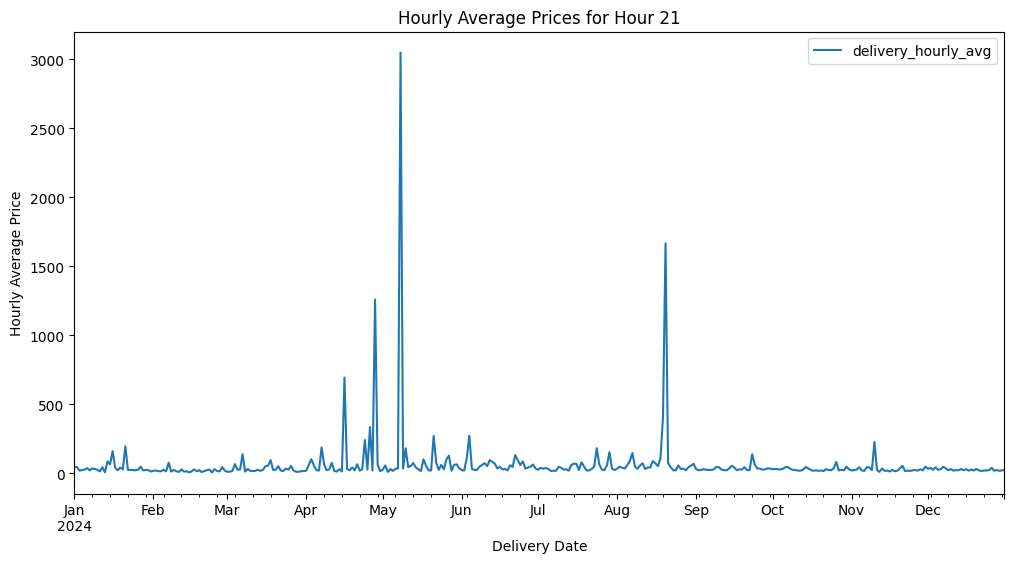

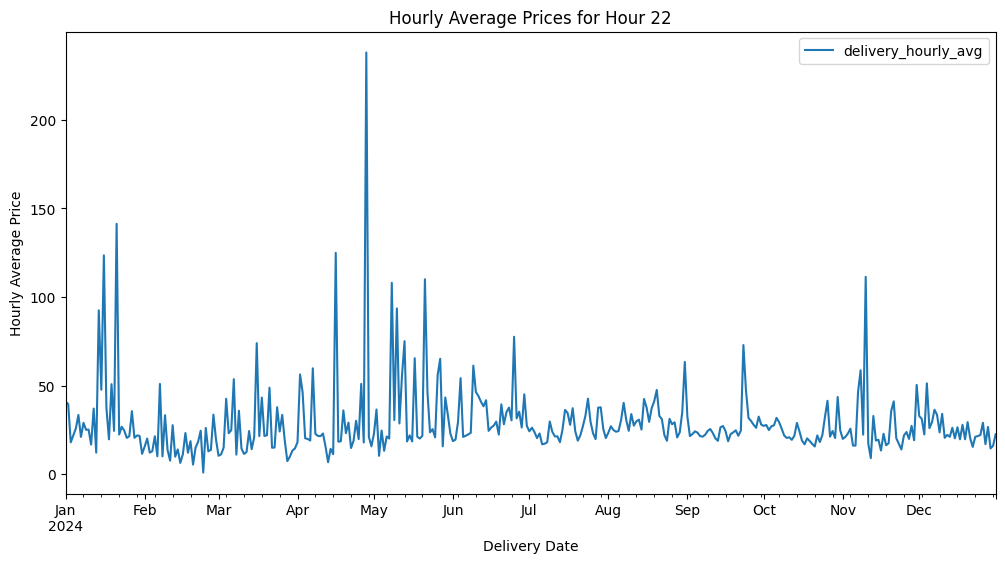

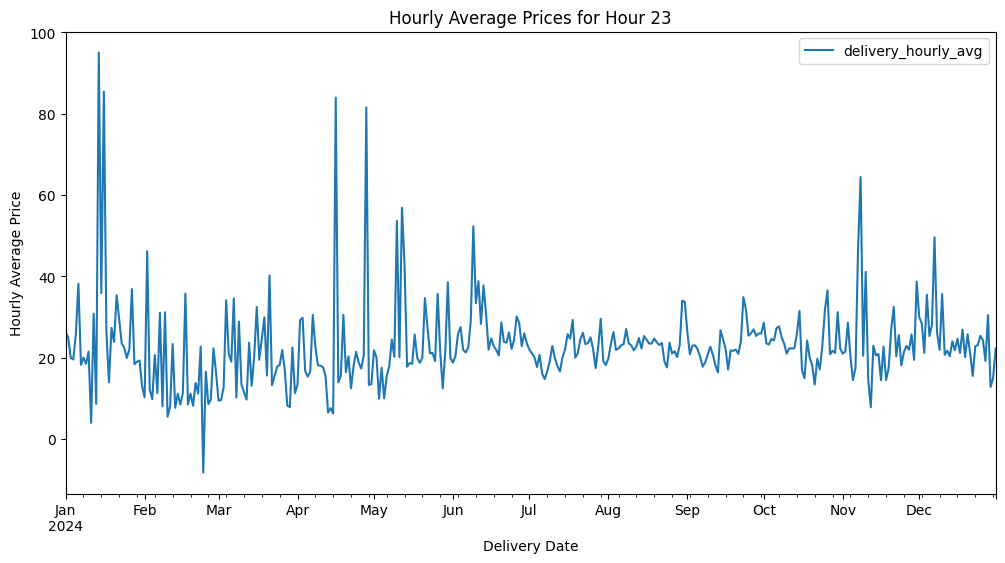

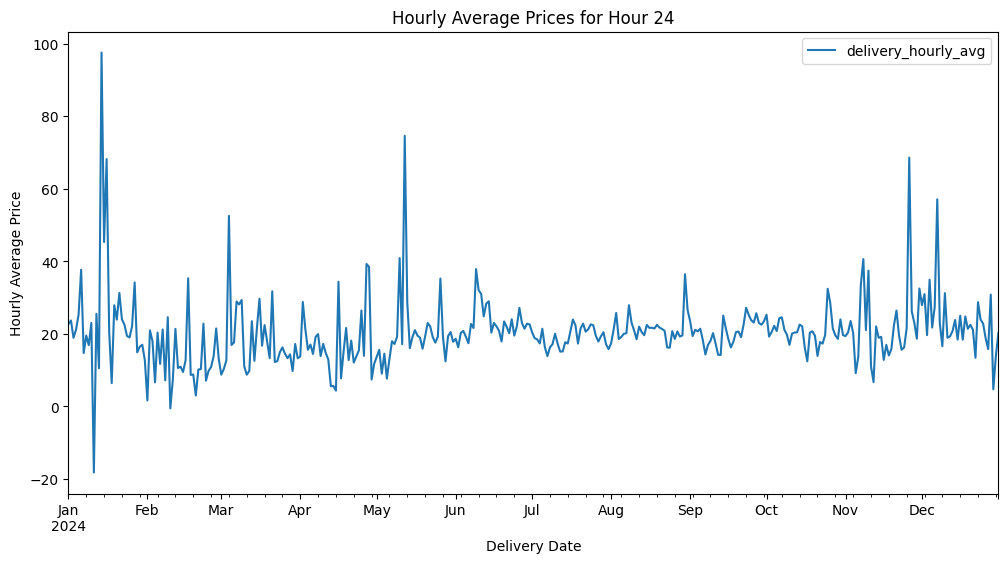

In [72]:
def plot_hours(df):
    for value in df['Delivery Hour'].unique():
        ax = df[df['Delivery Hour'] == value].plot(
            x='Delivery Date',
            y='delivery_hourly_avg',
            title=f'Hourly Average Prices for Hour {value}',
            figsize=(12, 6)
        )
        ax.set_ylabel('Hourly Average Price')
        ax.set_xlabel('Delivery Date')
        plt.show()

plot_hours(df)

<Axes: title={'center': 'Mean Prices by Hour'}, xlabel='Delivery Hour'>

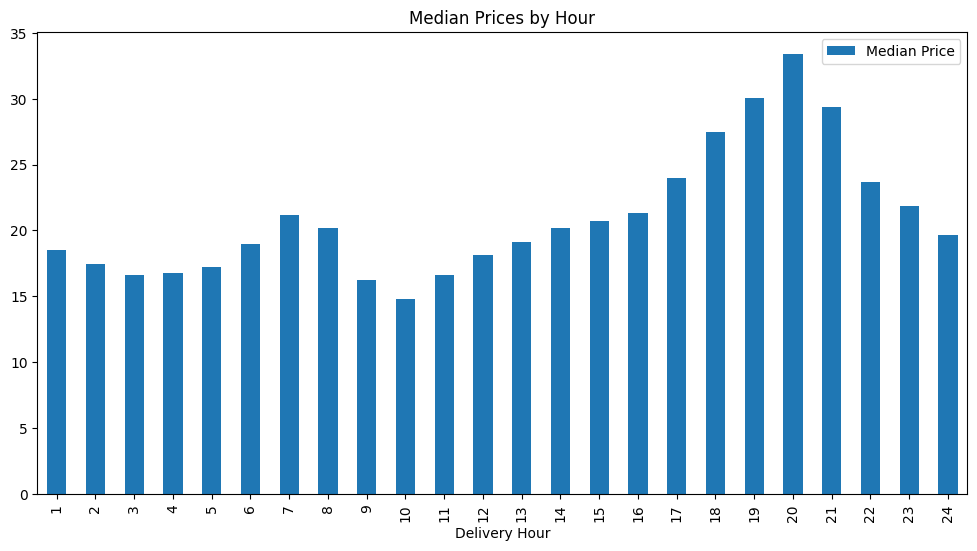

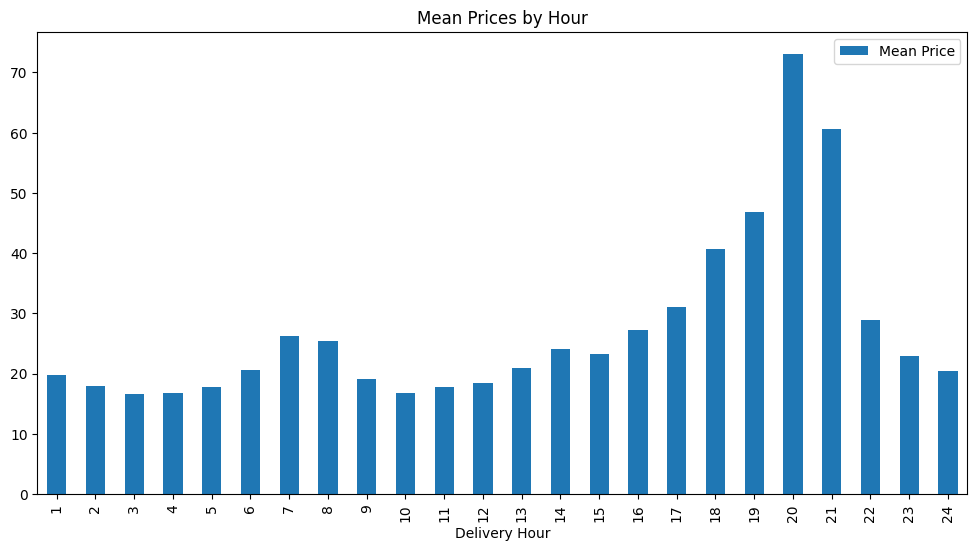

In [73]:
hash_map1 = {}
hash_map2 = {}
for value in df['Delivery Hour'].unique():
    hash_map1[value] = df[df['Delivery Hour'] == value]['delivery_hourly_avg'].median()
    hash_map2[value] = df[df['Delivery Hour'] == value]['delivery_hourly_avg'].mean()

df_hash1 = pd.DataFrame(list(hash_map1.items()), columns=['Delivery Hour', 'Median Price'])
df_hash2 = pd.DataFrame(list(hash_map2.items()), columns=['Delivery Hour', 'Mean Price'])

df_hash1.plot(x='Delivery Hour', y='Median Price', kind='bar', figsize=(12, 6), title='Median Prices by Hour')
df_hash2.plot(x='Delivery Hour', y='Mean Price', kind='bar', figsize=(12, 6), title='Mean Prices by Hour')


## Appears we want to purchase and store from hour 10 - hour 20...
#### That is very strange honestly, why would 8pm be the most expensive and 10 am the cheapest??

In [76]:
mean_df_20 = df_hash2[df_hash2['Delivery Hour'] == 20]

In [78]:
mean_df_20.head()

,Delivery Hour,Mean Price
19,20,73.06929


In [79]:
mean_df_10 = df_hash2[df_hash2['Delivery Hour'] == 10]

In [80]:
mean_df_20['Mean Price'].values[0] - mean_df_10['Mean Price'].values[0]

np.float64(56.29261953551912)

In [83]:
df.drop_duplicates(subset = ['Delivery Date', 'Delivery Hour'], keep = 'first', inplace = True)

In [85]:
df['biggestspread'] = df[df['Delivery Hour'] ==20]['delivery_hourly_avg'] - df[df['Delivery Hour'] ==10]['delivery_hourly_avg']

ValueError: cannot reindex on an axis with duplicate labels